# Exploratory Data Analysis: Nobel Prize trends

The Nobel Prize is a famous scientific award. Every year, it's given to prestigous scientists in the following categories: Chemistry, literature, physics, physiology or medicine, economics, and peace. 

The first Nobel Prize was handed out in 1901. An important questions is: Is there any kind of bias in this prize? What about gender, nationality or age?

To try to give some answers, we're going to use the dataset provided by The Nobel Foundation, which contains all prize winners from the 1901 to 2016 and perform an Exploratory Data Analysis (EDA)

## Load data

In [2]:
#Necesary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

nobel = pd.read_csv("datasets/nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## General Overview

Let's break out this work in three categories: Nationality, Gender and Age.

### Nationality 

In [24]:
print(len(nobel))
print(nobel["birth_country"].value_counts().head(15))

911
Male      0.944633
Female    0.055367
Name: sex, dtype: float64
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Switzerland                  16
Austria                      14
Norway                       12
China                        11
Denmark                      11
Name: birth_country, dtype: int64


 - The United states of America is by far the winner country. The next four countries are European (United Kingdom, Germany, France, Sweden). So, these 5 countries are responsable for more than half of the winners (approximately 53%)
 
 ### Gender

Male      0.944633
Female    0.055367
Name: sex, dtype: float64


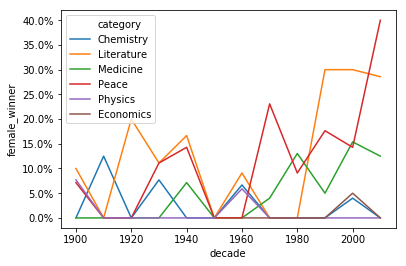

In [45]:
print(nobel["sex"].value_counts("Male"))
nobel['female_winner'] = nobel.sex == "Female"
prop_female_winners = nobel.groupby(["decade","category"], as_index=False)["female_winner"].mean()
ax = sns.lineplot(data=prop_female_winners, x="decade", y="female_winner", hue="category")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

- Near 95% of winners are men.
- In all categories, the porcentage of women winners are under 50% (gender inequality). 
- Increase tendency in Peace women winners category during last decades.
- Two categories with big inequalities: Chemistry and Physics.

In [43]:
nobel_repeat = nobel.groupby("full_name").filter(lambda group: len(group)>=2)
print(nobel_repeat.loc[:,["prize", "full_name"]])
print(nobel_repeat["full_name"].value_counts())

                                 prize  \
19     The Nobel Prize in Physics 1903   
62   The Nobel Prize in Chemistry 1911   
89          The Nobel Peace Prize 1917   
215         The Nobel Peace Prize 1944   
278  The Nobel Prize in Chemistry 1954   
283         The Nobel Peace Prize 1954   
298    The Nobel Prize in Physics 1956   
306  The Nobel Prize in Chemistry 1958   
340         The Nobel Peace Prize 1962   
348         The Nobel Peace Prize 1963   
424    The Nobel Prize in Physics 1972   
505  The Nobel Prize in Chemistry 1980   
523         The Nobel Peace Prize 1981   

                                             full_name  
19                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
298         

- It's interesting to see that 4 people have won two times the prize (among them, Marie Curie, the only woman) and two organizations  (Office of the United Nations High Commissioner for Refugees (UNHCR) and Comité international de la Croix Rouge (International Committee of the Red Cross)) 

### Age

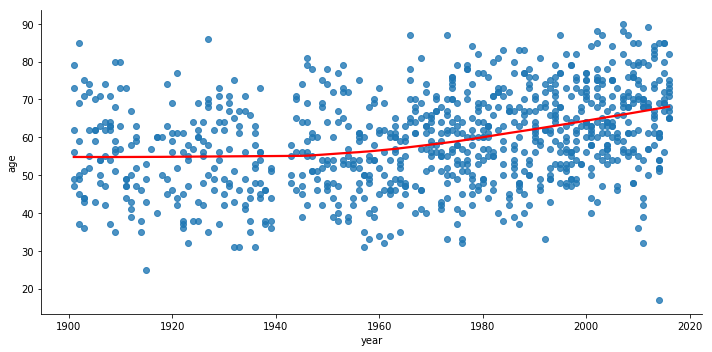

In [44]:
nobel["birth_date"] = pd.to_datetime(nobel["birth_date"], format = "%Y-%m-%d")
nobel['age'] = nobel["year"] - nobel["birth_date"].dt.year
# Simple Linear Regresion
sns.lmplot(x="year", y="age", data=nobel, lowess=True, aspect=2, line_kws={"color" : "red"})

- Age is generally stable around 55-60 years old, but since seventies it has increased slightly to 60-65 years.

## Conclusion

We have seen several trends related to three main variables, V = {Nationality, Age, Gender}. In all these three cases, we have observed some notorious trends that allow us to say the following three results:

- More man winners.
- American and European nationalities are in the top regarding to Nobel Prize winners.
- There's a huge gap age, but in mean terms, it turn around 60 years old. 

It's important to say that there are external factors that explain these inequalities. In this work, we limited our findings to Exploratory and Descriptive analysis.